In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import copy


In [2]:
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/PBMC_Hao/GSE164378_Hao/Hao_PBMC_GSE164378.h5ad')
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\Hao_PBMC_GSE164378.h5ad")
adata = sc.read_h5ad("/home/jovyan/work/Research_datasets/PBMC_Hao/GSE164378_Hao/Hao_PBMC_GSE164378.h5ad")
adata.shape

(161764, 33538)

In [3]:
# meta = pd.read_csv(r"C:\Users\evanlee\Documents\Research_datasets\PBMC_Hao\GSE164378_Hao\GSE164378_sc.meta.data_3P.csv", index_col=0)
meta = pd.read_csv(r"/home/jovyan/work/Research_datasets/PBMC_Hao/GSE164378_Hao/GSE164378_sc.meta.data_3P.csv", index_col=0)
adata.obs['time'] = meta['time']
adata.obs['lane'] = meta['lane']

In [4]:
adata.obs.head()

,celltype.l1,celltype.l2,celltype.l3,Phase,Batch,donor,nCount_ADT,nFeature_ADT,nCount_RNA,nFeature_RNA,time,lane
L1_AAACCCAAGAAACTCA,Mono,CD14 Mono,CD14 Mono,G1,Batch1,P2,7535,217,10823,2915,7,L1
L1_AAACCCAAGACATACA,CD4 T,CD4 TCM,CD4 TCM_1,G1,Batch1,P1,6013,209,5864,1617,7,L1
L1_AAACCCACAACTGGTT,CD8 T,CD8 Naive,CD8 Naive,S,Batch1,P4,6620,213,5067,1381,2,L1
L1_AAACCCACACGTACTA,NK,NK,NK_2,G1,Batch1,P3,3567,202,4786,1890,7,L1
L1_AAACCCACAGCATACT,CD8 T,CD8 Naive,CD8 Naive,G1,Batch1,P4,6402,215,6505,1621,7,L1


## Normalization

In [5]:
# Normalization
# each observation (cell) has a total count equal to the median of total counts for observations (cells)
sc.pp.normalize_total(adata, target_sum=None)
# log1p transformation
sc.pp.log1p(adata)

## HVG

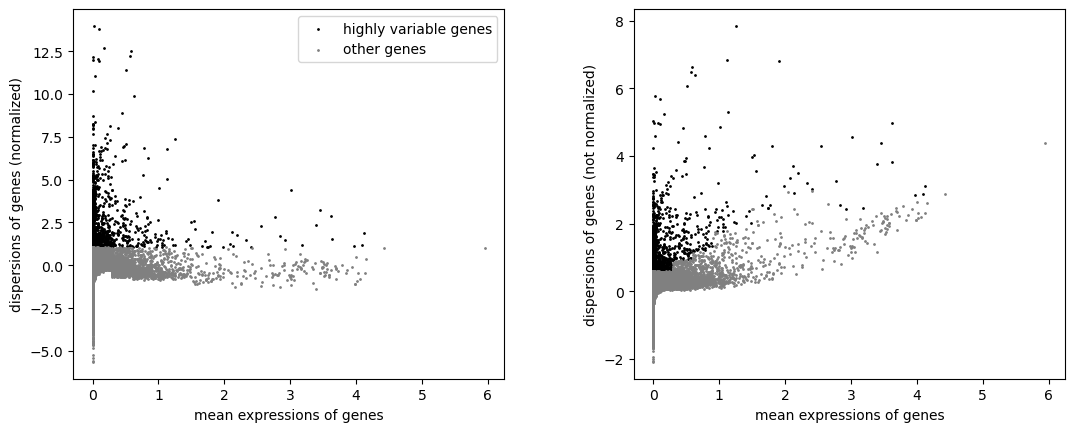

In [6]:
# HVG2000
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
# sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [7]:
adata.var.highly_variable.sum()

2000

In [8]:
adata.raw = adata

In [9]:
# filtering HVG2000
adata = adata[:, adata.var.highly_variable]
adata.shape

(161764, 2000)

In [10]:
# Scale each gene to unit variance. Clip values exceeding standard deviation 10.
sc.pp.scale(adata, max_value=10)

/opt/conda/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


## UMAP before batch effect correction

In [11]:
sc.tl.pca(adata, svd_solver="arpack")

In [12]:
# neighborhood graph
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)

2024-03-21 17:27:00.415056: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-21 17:27:00.513555: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-21 17:27:01.031870: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-03-21 17:27:01.031976: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

/opt/conda/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


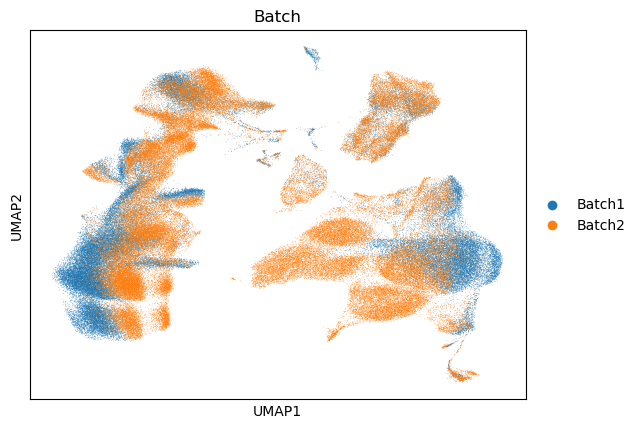

In [13]:
sc.tl.umap(adata)
sc.pl.umap(adata, color='Batch')

## Batch effect correction with Combat

In [ ]:
sc.pp.combat(adata, key='Batch', inplace=True)

In [ ]:
sc.tl.pca(adata, svd_solver="arpack")

In [ ]:
# neighborhood graph
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)

In [ ]:
sc.tl.umap(adata)
sc.pl.umap(adata, color='Batch')